**If you lost points on the last checkpoint you can get them back by responding to TA/IA feedback**  

Update/change the relevant sections where you lost those points, make sure you respond on GitHub Issues to your TA/IA to call their attention to the changes you made here.

Please update your Timeline... no battle plan survives contact with the enemy, so make sure we understand how your plans have changed.

# COGS 108 - EDA Checkpoint

# Names

- Michael He
- Felicia Zhang
- Dhiren Patel
- Sarah Li

# Research Question

Do national and local job market trends (measured by the number of jobs across the nation and in certain metropolitan areas) influence the selection of majors among undergraduate students at UCSD and other selected universities across the nation? What is more influential, the national or local job market, and which years prior to graduation are most influential on major choice?

## Background and Prior Work

It can easily be stated that people go to college in order to get a job after graduation. Since the major that students graduate with affect the industry they can work in after graduation, it seems like a natural assumption that the job market has some effect on what subject students choose to major in. 

Research has been done on similar topics; Baker et. al posits that community college graduates are about 1.5% more likely to choose a major that corresponds with a 1% increase in salary <a name="cite_ref-1"></a>[<sup>1</sup>](#cite_note-1). Utilizing logit models to estimate the probabilities of different major selections and Ordinary Least Squares to model the relationship between major choice, employment security, and salary expectations, the paper concludes that community college students have less access to accurate job market information, and thus mostly consider course enjoyment, while barely considering employment probability. 

Similarly, Long et. al find that college majors are most strongly tied to salaries from 3 years before graduation (when most students have to choose their major) <a name="cite_ref-2"></a>[<sup>2</sup>](#cite_note-2). Their analysis covered both national and state (Washington) wage and major trends, using regression models to estimate the association between major choice and wage rates from a few years ago. They also used Granger causality tests to measure if previous data on wages were predictive of major choice. 

Despite there being a lot of research tying the job market to student major choices, we found little research analyzing the effects of employment rates in various industry sectors on major choice. We also aim to analyze a wider range of factors, covering different university locations and university types (public vs. private). This is because we’ve seen some research show that location affects college education, but not necessarily the major distributions at those locations <a name="cite_ref-3"></a>[<sup>3</sup>](#cite_note-3). While we have seen that the job market has significant influence on major choices, we aim to discover the timeframe between the job market and major effects, as well as if the local or national job market has more influence.

1. <a name="cite_note-1"></a> [1](#cite_ref-1) Baker, Rachel, et al. The Effect of Labor Market Information on Community College Students’ Major Choice, ScienceDirect, Aug. 2018, [edpolicy.umich.edu/sites/epi/files/uploads/02-2017-labor-market-major-choice.pdf](https://edpolicy.umich.edu/sites/epi/files/uploads/02-2017-labor-market-major-choice.pdf)
2. <a name="cite_note-2"></a> [2](#cite_ref-2) Long et. al Do Students’ College Major Choices Respond to Changes in Wages, Calder Center, January 2014, [https://caldercenter.org/sites/default/files/WP-107.pdf](https://caldercenter.org/sites/default/files/WP-107.pdf)
3. <a name="cite_note-3"></a> [3](#cite_ref-3) Higdon, Why does college location matter, April 2017, [https://www.northcentral.edu/blog/why-does-college-location-matter/](https://www.northcentral.edu/blog/why-does-college-location-matter/)


# Hypothesis


We predict that undergraduate major students are influenced by job market trends, with the strongest correlation between the majors students select and the job market conditions from approximately 4 years prior to when they first enter college. Specifically, we believe that national job market trends, such as wage growth and demand within central industries (e.g., healthcare, technology), will show a strong correlation with the selection of undergraduate majors across the United States. Furthermore, local job market trends, including employment opportunities and industry-specific demand will have a stronger influence on the major selection at universities such as UCSD, where students are more prone to aligning their academic focus with the region’s economic landscape.

For this study, we would define major choice as the number of individuals who graduated with the major (or a similar one), and job market trends as the number of jobs in that field. Since our background research shows that factors such as wages affect major choice, it can be assumed that the increased possibility of finding a job in that field (which would lead to the receiving wages in the first place), would also be a factor in people’s major decision. We believe that these two variables would have a positive correlation — as the number of jobs in a certain field increases, so does the number of college students who choose a related major.

# Data

## Data overview

- Dataset #1
  - Dataset Name: US Bureau of Labor Statistics Occupational Employment and Wage Estimates by Metropolitan and Nonmetropolitan Area (BLS OEWS for short)
  - Link to the dataset: [BLS OEWS](https://www.bls.gov/oes/tables.htm)
  - Cleaned dataset: [all_year_bls](dataset_work/bls_data/useful_csvs/all_years.csv)
  - Number of observations: 74580
  - Number of variables: 23
- Dataset #2 
  - Dataset Name: School Common Data Set Degrees Conferred (CDS for short)
  - Link to the dataset: [CDS](https://docs.google.com/spreadsheets/d/19kN52hyig4k--l1GXVEiIQVoSM10L_shYSVXepYsSDM/edit?usp=sharing)\
  This is actually a link to a Google Sheet, where you can find the link to each school's CDS\
  - Cleaned dataset: [all_year_csd](dataset_work/cds_data/useful_csvs/all_years.csv)
  - Number of observations: 3092
  - Number of variables: 7

#### BLS OEWS:
This dataset encompasses 2006-2023 employment data by metropolitan/non-metropolitan area. Our cleaned dataset has 8 areas, each of which were chosen because of their proximity to one of the schools we are analyzing. The important variables in the data set are year, location, occupation title (string), total employment (int), and average salary (int), although the other fields we left in the dataset also help with general analysis and classification. The employment count proportion and the salary may be proxies for overall desirability of the job. 

To clean this dataset, we had to download all the `.xls` and `.xlsx` files from the BLS, convert them to `.csv`s, and then pull only the relevant areas from each year's dataset. Then, to combine the datasets and standardize the columns, some columns were dropped or renamed, leading to the overall dataset. 

#### CDS:
This dataset encompasses 8 US universities, which were chosen for reasons listed in our [Google Sheet](https://docs.google.com/spreadsheets/d/19kN52hyig4k--l1GXVEiIQVoSM10L_shYSVXepYsSDM/edit?usp=sharing). The most limiting university was Colgate University, with the first CDS being from 2014, so the years span from 2014 graduation to 2023 graduation degrees conferred. This gives us a good 10 year window to work with. The important variables in this dataset are year, college, Category (major), and Bachelor's (a percentage of the graduating class). The major percentages may be proxies for the overall desirability of the major. 

To clean this dataset, we had to download all the `.pdf` files of the CDS from each school. We then created and ran a pdf scraper to pull the Degrees Conferred table from each PDF; there were a few cases where this had to be done manually because of inconsistent formatting or lack of downloadable PDF. Then, to combine the datasets, equivalent columns were combined, leading to the overall dataset.

##### Combining
To combine these datasets, it's necessary to line up majors at colleges with jobs. This means we will probably use a classifier to fit the jobs in 'OCC-TITLE' to the majors in 'Category'. Then, we can graph the relationships between employment rates and major trends. 

## BLS OEWS

In [46]:
# Import necessary libraries

import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Changes all xls files into csv files

def xls_x_to_csv(file_path, file_type):
    # Read the .xls file
    df = pd.read_excel(file_path)
    # Define the .csv file path
    csv_file_path = file_path.replace(file_type, '.csv')
    # Save the dataframe to a .csv file
    df.to_csv(csv_file_path, index=False)

def all_xls_x_to_csv(bls_data_path):
    # Iterate over each year folder in the bls_data folder
    for year_folder in os.listdir(bls_data_path):
        if year_folder == "full_processed_csvs" or year_folder == "useful_csvs":
            continue
        year_path = os.path.join(bls_data_path, year_folder)
        if os.path.isdir(year_path):
            # Iterate over each .xls file in the year folder
            for file in os.listdir(year_path):
                if file.endswith('.xls'):
                    file_path = os.path.join(year_path, file)
                    xls_x_to_csv(file_path, '.xls')
                if file.endswith('.xlsx'):
                    file_path = os.path.join(year_path, file)
                    xls_x_to_csv(file_path, '.xlsx')
                    
# Uncomment the line below to change all xls and xlsx files into csv files
# all_xls_x_to_csv('dataset_work/bls_data')

In [3]:
# Read through each year of csvs, and get only relevant areas into one csv
relevant_areas = ["Los Angeles-Long Beach-Santa Ana, CA", 
"Los Angeles-Long Beach-Anaheim, CA", # shifts classification in 2015
"Western New Hampshire nonmetropolitan area",
"Southwestern New Hampshire nonmetropolitan area",
"West Central New Hampshire nonmetropolitan area",
"Southwest New Hampshire nonmetropolitan area",
"West Central-Southwest New Hampshire nonmetropolitan area",
"San Diego-Carlsbad-San Marcos, CA",
"San Diego-Carlsbad, CA", # shifts classification in 2015
"Ann Arbor, MI",
"Washington-Arlington-Alexandria, DC-VA-MD-WV Metropolitan Division",
"Spokane, WA",
"Spokane-Spokane Valley, WA", # shifts classification in 2015
"Winston-Salem, NC",
"Utica-Rome, NY",
]

# All the relevant New Hampshire areas:
# "Other New Hampshire nonmetropolitan area", - this means central - do not use
# "Western New Hampshire nonmetropolitan area", - use
# "Southwestern New Hampshire nonmetropolitan area", - use
# "West Central New Hampshire nonmetropolitan area", - use - 2015
# "Central New Hampshire nonmetropolitan area", - do not use - 2015
# "Southwest New Hampshire nonmetropolitan area", - use - 2015
# "West Central-Southwest New Hampshire nonmetropolitan area", - 2018 combination of west central and southwest - only choice aside from central in 2018 onwards
# overall, we'll use West Central-Southwest, while avoiding Central?

def process_year(bls_data_path, year_path, relevant_areas, column_name, year_number):
    # Create the output directory if it doesn't exist
    processed_folder = os.path.join(bls_data_path, "full_processed_csvs")
    os.makedirs(processed_folder, exist_ok=True)

    result_df = pd.DataFrame()

    # Iterate through all CSV files in the year folder
    for file in os.listdir(year_path):
        if file.endswith('.csv'):
            file_path = os.path.join(year_path, file)
            df = pd.read_csv(file_path)
            if column_name in df.columns:
                # Filter rows where the column value is in relevant_areas
                filtered_df = df[df[column_name].isin(relevant_areas)]
                result_df = pd.concat([result_df, filtered_df], ignore_index=True)

    # Define the output file path
    output_file_path = os.path.join(processed_folder, f"{year_number}_relevant.csv")

    # Write the filtered DataFrame to the output file
    result_df.to_csv(output_file_path, index=False)
    print(f"Processed data saved to {output_file_path}")

def process_all_years(bls_data_path, relevant_areas):
    # Iterate over each year folder in the bls_data folder
    for year_folder in os.listdir(bls_data_path):
        if year_folder == "full_processed_csvs" or year_folder == "useful_csvs":
            continue
        year_number = int(year_folder)
        year_path = os.path.join(bls_data_path, year_folder)
        column_name = ''
        if os.path.isdir(year_path):
             # AREA_NAME 2006-2018, area_title in 2019, AREA_TITLE onwards
            if year_number < 2019:
                column_name = 'AREA_NAME'
            elif year_number == 2019:
                column_name = 'area_title'
            elif year_number > 2019:
                column_name = 'AREA_TITLE'
            else:
                print("Error: invalid year")
                exit(1)
            process_year(bls_data_path, year_path, relevant_areas, column_name, year_number)

process_all_years('dataset_work/bls_data', relevant_areas)

Processed data saved to dataset_work/bls_data\full_processed_csvs\2006_relevant.csv
Processed data saved to dataset_work/bls_data\full_processed_csvs\2007_relevant.csv
Processed data saved to dataset_work/bls_data\full_processed_csvs\2008_relevant.csv
Processed data saved to dataset_work/bls_data\full_processed_csvs\2009_relevant.csv
Processed data saved to dataset_work/bls_data\full_processed_csvs\2010_relevant.csv
Processed data saved to dataset_work/bls_data\full_processed_csvs\2011_relevant.csv
Processed data saved to dataset_work/bls_data\full_processed_csvs\2012_relevant.csv
Processed data saved to dataset_work/bls_data\full_processed_csvs\2013_relevant.csv
Processed data saved to dataset_work/bls_data\full_processed_csvs\2014_relevant.csv
Processed data saved to dataset_work/bls_data\full_processed_csvs\2015_relevant.csv
Processed data saved to dataset_work/bls_data\full_processed_csvs\2016_relevant.csv
Processed data saved to dataset_work/bls_data\full_processed_csvs\2017_relev

In [4]:
# Format all area names and column names to be consistent, more cleaning done in next step

def format_area_names(df):
    if 'AREA_NAME' in df.columns:
        df.rename(columns={'AREA_NAME': 'AREA_TITLE'}, inplace=True)
    df['AREA_TITLE'] = df['AREA_TITLE'].replace("Los Angeles-Long Beach-Santa Ana, CA", "Los Angeles-Long Beach-Anaheim, CA")
    df['AREA_TITLE'] = df['AREA_TITLE'].replace("San Diego-Carlsbad-San Marcos, CA", "San Diego-Carlsbad, CA")
    df['AREA_TITLE'] = df['AREA_TITLE'].replace("Spokane, WA", "Spokane-Spokane Valley, WA")
    df['AREA_TITLE'] = df['AREA_TITLE'].replace("Western New Hampshire nonmetropolitan area", "West Central-Southwest New Hampshire nonmetropolitan area")
    df['AREA_TITLE'] = df['AREA_TITLE'].replace("Southwestern New Hampshire nonmetropolitan area", "West Central-Southwest New Hampshire nonmetropolitan area")
    df['AREA_TITLE'] = df['AREA_TITLE'].replace("West Central New Hampshire nonmetropolitan area", "West Central-Southwest New Hampshire nonmetropolitan area")
    df['AREA_TITLE'] = df['AREA_TITLE'].replace("Southwest New Hampshire nonmetropolitan area", "West Central-Southwest New Hampshire nonmetropolitan area")
    if 'GROUP' in df.columns:
        df.rename(columns={'GROUP': 'OCC_GROUP'}, inplace=True)
    elif 'O_GROUP' in df.columns:
        df.rename(columns={'O_GROUP': 'OCC_GROUP'}, inplace=True)
    if 'LOC QUOTIENT' in df.columns:
        df.rename(columns={'LOC QUOTIENT': 'LOC_QUOTIENT'}, inplace=True)
    if 'LOC_QUOTIENT' not in df.columns:
        df['LOC_QUOTIENT'] = pd.NA
    
    return df

def format_column_names(df):
    for column in df.columns:
        df.rename(columns={column: column.upper()}, inplace=True)
    return df

def format_year(file_path):
    df = pd.read_csv(file_path)
    df = format_column_names(df)
    df = format_area_names(df)
    df.to_csv(file_path, index=False)

def format_all_years(processed_csv_path):
    for file in os.listdir(processed_csv_path):
        if file.endswith('.csv'):
            file_path = os.path.join(processed_csv_path, file)
            format_year(file_path)

format_all_years('dataset_work/bls_data/full_processed_csvs')

In [5]:
# Finish cleaning data by dropping useless columns

def drop_useless_columns(df):
    # Drop columns that are not needed
    drop_list = ['AREA_TYPE', 'NAICS', 'NAICS_TITLE', 'I_GROUP', 'OWN_CODE', 'OCC_CODE', 'PCT_TOTAL', 'PCT_RPT', 'PRIM_STATE', 'AREA']
    # OCC_CODE is the same as OCC_TITLE, PCT_TOTAL and PCT_RPT is always NaN, PRIM_STATE is in AREA_TITLE, AREA is same as AREA_TITLE, others cause issues
    for column in drop_list:
        if column in df.columns:
            df.drop(columns=[column], inplace=True)
    df.dropna(axis=1, how='all')
    return df

def drop_all_useless_columns(processed_csv_path):
    for file in os.listdir(processed_csv_path):
        if file.endswith('.csv'):
            file_path = os.path.join(processed_csv_path, file)
            df = pd.read_csv(file_path)
            out_df = drop_useless_columns(df)
            out_df.to_csv(os.path.join('dataset_work/bls_data/useful_csvs', file), index=False)

drop_all_useless_columns('dataset_work/bls_data/full_processed_csvs')

In [6]:
# Test to check if all years have the same columns and if all areas are represented

def test_csvs(useful_csv_path):
    reference_columns = None
    reference_area_titles = None
    for file in os.listdir(useful_csv_path):
        if file.endswith('.csv'):
            file_path = os.path.join(useful_csv_path, file)
            df = pd.read_csv(file_path)
            if reference_columns is None:
                reference_columns = set(df.columns)
            else:
                if set(df.columns) != reference_columns:
                    print(f"Warning: Columns in {file} do not match the reference columns.")
            if reference_area_titles is None:
                reference_area_titles = set(df['AREA_TITLE'].unique())
            else:
                if set(df['AREA_TITLE'].unique()) != reference_area_titles:
                    print(f"Warning: Areas in {file} do not match the reference areas.")
            unique_area_titles = df['AREA_TITLE'].nunique()
            if unique_area_titles != 8:
                print(f"Warning: {file} does not have all 8 areas represented.")
            

In [7]:
# Combine all years into one csv

def combine_years(useful_csv_path):
    combined_df = pd.DataFrame()
    for file in os.listdir(useful_csv_path):
        if file.endswith('.csv') and file != 'all_years.csv':
            file_path = os.path.join(useful_csv_path, file)
            df = pd.read_csv(file_path)
            year = int(file.split('_')[0])
            df['YEAR'] = year
            combined_df = pd.concat([combined_df, df], ignore_index=True)
    combined_df.dropna(axis=1, how='all')
    column_order = ['YEAR', 'AREA_TITLE', 'OCC_TITLE', 'OCC_GROUP', 'TOT_EMP', 'EMP_PRSE', 'JOBS_1000', 'LOC_QUOTIENT', 'H_MEAN', 'A_MEAN', 'MEAN_PRSE', 
    'H_PCT10', 'H_PCT25', 'H_MEDIAN', 'H_PCT75', 'H_PCT90', 'A_PCT10', 'A_PCT25', 'A_MEDIAN', 'A_PCT75', 'A_PCT90', 'ANNUAL', 'HOURLY']
    combined_df = combined_df[column_order]
    combined_df = combined_df.sort_values(by=['YEAR', 'AREA_TITLE'], ascending=[True, True], kind='mergesort')
    combined_df.to_csv('dataset_work/bls_data/useful_csvs/all_years.csv', index=False)

combine_years('dataset_work/bls_data/useful_csvs')

In [8]:
df = pd.read_csv('dataset_work/bls_data/useful_csvs/all_years.csv')
print(f"DF shape: {df.shape}")
df.head()

DF shape: (74580, 23)


,YEAR,AREA_TITLE,OCC_TITLE,OCC_GROUP,TOT_EMP,EMP_PRSE,JOBS_1000,LOC_QUOTIENT,H_MEAN,A_MEAN,...,H_MEDIAN,H_PCT75,H_PCT90,A_PCT10,A_PCT25,A_MEDIAN,A_PCT75,A_PCT90,ANNUAL,HOURLY
0,2006,"Ann Arbor, MI",All Occupations,NaN,197810,1.5,NaN,NaN,22.29,46370,...,18.26,27.99,39.96,17710,24330,37970,58220,83120,NaN,NaN
1,2006,"Ann Arbor, MI",Management occupations,major,8060,3.7,NaN,NaN,45.54,94720,...,41.80,56.95,#,43940,59410,86940,118450,#,NaN,NaN
2,2006,"Ann Arbor, MI",Chief executives,NaN,540,9.6,NaN,NaN,76.39,158890,...,#,#,#,92220,121340,#,#,#,NaN,NaN
3,2006,"Ann Arbor, MI",General and operations managers,NaN,1670,6.1,NaN,NaN,46.89,97530,...,41.20,59.33,#,46290,58170,85690,123400,#,NaN,NaN
4,2006,"Ann Arbor, MI",Legislators,NaN,30,27.0,NaN,NaN,*,*,...,*,*,*,*,*,*,*,*,True,NaN


## CDS

In [1]:
# import libraries

import pdfplumber
import pandas as pd
import numpy as np
import os

ModuleNotFoundError: No module named 'pdfplumber'

In [ ]:
# Pull degrees conferred tables from CDS PDFs

def extract_table_from_pdf(pdf_path, pdf_name, full_processed_csvs_folder):
    df_results = pd.DataFrame()
    print(f"Processing file {pdf_name}")
    with pdfplumber.open(pdf_path) as pdf:
        # Iterate over the pages in the PDF
        for page_num, page in enumerate(pdf.pages, start=1):
            # Extract text content from the page
            text = page.extract_text()
            # Check if "degrees conferred" exists in the page text (case insensitive)
            if "degrees conferred" in text.lower():
                print(f"Found 'degrees conferred' on page {page_num}. Extracting table...")
                tables = page.extract_tables()
                for table in tables:
                    df = pd.DataFrame(table[1:], columns=table[0])
                    df.columns = df.columns.str.replace('\n', ' ', regex=True)
                    df_results = pd.concat([df_results, df], ignore_index=True)
                special_cases = ["ucsd_2023", "wsu_2023"]
                extra_special_cases = ["caltech_2021", "caltech_2022", "caltech_2023", "asu_2021", "asu_2022", "asu_2023"]
                if pdf_name in special_cases : # handle special case where table is split across two pages on a case-by-case basis
                    next_page = pdf.pages[page_num]
                    next_tables = next_page.extract_tables()
                    if next_tables:
                        for table in next_tables:
                            df = pd.DataFrame(table[1:], columns=table[0])
                            top_row = df.columns
                            df.columns = df_results.columns
                            df.loc[-1] = top_row 
                            df.index = df.index + 1
                            df = df.sort_index()
                            df_results = pd.concat([df_results, df], ignore_index=True)
                if pdf_name in extra_special_cases : # handle special case where table is split across two pages and the column names are on the second page
                    next_page = pdf.pages[page_num]
                    next_tables = next_page.extract_tables()
                    if next_tables:
                        for table in next_tables:
                            df = pd.DataFrame(table[1:], columns=table[0])
                            df_results = pd.concat([df_results, df], ignore_index=True)
                break
        if df_results.empty:
            print(f"'degrees conferred' not found in page {page_num}.")

    if not df_results.empty:
        df_results = df_results.reset_index(drop=True)
        year_directory = os.path.join(full_processed_csvs_folder, pdf_name.split("_")[1])
        if not os.path.exists(year_directory):
            os.makedirs(year_directory)
        file_name = os.path.join(year_directory, f"{pdf_name}_degrees_conferred.csv")
        df_results.to_csv(file_name, index=False)
        print(f"Table saved to {file_name}.")

def extract_all_tables(cds_data_folder, full_processed_csvs_folder):
    for college_folder in os.listdir(cds_data_folder):
        if college_folder == "full_processed_csvs" or college_folder == "useful_csvs" or college_folder == ".DS_Store" or college_folder == "manual":
            continue
        college_folder_path = os.path.join(cds_data_folder, college_folder)
        for pdf_file in os.listdir(college_folder_path):
            if pdf_file.endswith('.pdf'):
                pdf_file_path = os.path.join(college_folder_path, pdf_file)
                extract_table_from_pdf(pdf_file_path, pdf_file.split(".")[0], full_processed_csvs_folder)

extract_all_tables("dataset_work/cds_data", "dataset_work/cds_data/full_processed_csvs")

Processing file ucsd_2016
Found 'degrees conferred' on page 28. Extracting table...
Table saved to dataset_work/cds_data/full_processed_csvs/2016/ucsd_2016_degrees_conferred.csv.
Processing file ucsd_2017
Found 'degrees conferred' on page 30. Extracting table...
Table saved to dataset_work/cds_data/full_processed_csvs/2017/ucsd_2017_degrees_conferred.csv.
Processing file ucsd_2015
Found 'degrees conferred' on page 28. Extracting table...
Table saved to dataset_work/cds_data/full_processed_csvs/2015/ucsd_2015_degrees_conferred.csv.
Processing file ucsd_2014
Found 'degrees conferred' on page 27. Extracting table...
Table saved to dataset_work/cds_data/full_processed_csvs/2014/ucsd_2014_degrees_conferred.csv.
Processing file ucsd_2023
Found 'degrees conferred' on page 55. Extracting table...
Table saved to dataset_work/cds_data/full_processed_csvs/2023/ucsd_2023_degrees_conferred.csv.
Processing file ucsd_2022
Found 'degrees conferred' on page 27. Extracting table...
Table saved to datase

In [ ]:
# Clean datasets by merging columns with similar names and combining data from different years

def merge_column_names(file_path):
    df = pd.read_csv(file_path)
    if "Diploma/ Certificates" in df.columns:
        df = df.rename(columns={"Diploma/ Certificates": "Diploma/Certificates"})
    elif "Diplomas / Certificates" in df.columns:
        df = df.rename(columns={"Diplomas / Certificates": "Diploma/Certificates"})
    elif "\"Diploma/\nCertificates\"" in df.columns:
        df = df.rename(columns={"\"Diploma/\nCertificates\"": "Diploma/Certificates"})
    if "CIP 2010 Categories to Include" in df.columns:
        df = df.rename(columns={"CIP 2010 Categories to Include": "CIP Code"})
    elif "CIP Code Number" in df.columns:
        df = df.rename(columns={"CIP Code Number": "CIP Code"})
    elif "CIP 2020 Categories to Include" in df.columns:
        df = df.rename(columns={"CIP 2020 Categories to Include": "CIP Code"})
    elif "CIP 2021 Categories to Include" in df.columns:
        df = df.rename(columns={"CIP 2021 Categories to Include": "CIP Code"})
    elif "CIP202 Categories to Include" in df.columns:
        df = df.rename(columns={"CIP202 Categories to Include": "CIP Code"})
    elif "\"CIP202\nCategories\nto\nInclude\"" in df.columns:
        df = df.rename(columns={"\"CIP202\nCategories\nto\nInclude\"": "CIP Code"})
    if "Category (UM-Ann Arbor grants Bachelor's degrees; no undergraduate Diploma/Certificates or Associate degrees)" in df.columns:
        df = df.rename(columns={"Category (UM-Ann Arbor grants Bachelor's degrees; no undergraduate Diploma/Certificates or Associate degrees)": "Category"})
    if "Unnamed: 2" in df.columns:
        df = df.rename(columns={"Unnamed: 2": "Bachelor's"})
    if "Bachelor’s degrees (First majors)" in df.columns:
        df = df.drop(columns=["Bachelor’s degrees (First majors)"])
    return df
    
def merge_all_column_names(full_processed_csvs_folder):
    for year_folder in os.listdir(full_processed_csvs_folder):
        if year_folder == ".DS_Store" or year_folder == "combined":
            continue
        year_folder_path = os.path.join(full_processed_csvs_folder, year_folder)
        for college_file in os.listdir(year_folder_path):
            if college_file.endswith('.csv'):
                college_file_path = os.path.join(year_folder_path, college_file)
                df = merge_column_names(college_file_path)
                df.to_csv(college_file_path, index=False)

def combine_year_data(full_processed_csvs_folder):
    for year_folder in os.listdir(full_processed_csvs_folder):
        if year_folder == ".DS_Store" or year_folder == "combined":
            continue
        year_folder_path = os.path.join(full_processed_csvs_folder, year_folder)
        combined_df = pd.DataFrame()
        for college_file in os.listdir(year_folder_path):
            if college_file.endswith('.csv'):
                college_file_path = os.path.join(year_folder_path, college_file)
                df = pd.read_csv(college_file_path)
                df["college"] = college_file.split("_")[0]
                df["year"] = year_folder
                combined_df = pd.concat([combined_df, df], ignore_index=True)
        combined_folder = "dataset_work/cds_data/useful_csvs"
        if not os.path.exists(combined_folder):
            os.makedirs(combined_folder)
        combined_df.to_csv(os.path.join(combined_folder, f"{year_folder}_combined.csv"), index=False)

merge_all_column_names("dataset_work/cds_data/full_processed_csvs")
combine_year_data("dataset_work/cds_data/full_processed_csvs")

In [ ]:
# Fix UMich data :///
for combined_csv in os.listdir("dataset_work/cds_data/useful_csvs"):
    df = pd.read_csv(os.path.join("dataset_work/cds_data/useful_csvs", combined_csv))
    df.replace("--", "", inplace=True)
    if "Bachelor's" in df.columns:
        df['Bachelor’s'] = df['Bachelor’s'].combine_first(df["Bachelor's"])
        df = df.drop(columns=["Bachelor's"])
    df.to_csv(os.path.join("dataset_work/cds_data/useful_csvs", combined_csv), index=False)

In [ ]:
# Combine data from different years into a single dataset

def combine_years(useful_csv_path):
    combined_df = pd.DataFrame()
    for file in os.listdir(useful_csv_path):
        if file.endswith('.csv') and file != 'all_years.csv':
            file_path = os.path.join(useful_csv_path, file)
            df = pd.read_csv(file_path)
            combined_df = pd.concat([combined_df, df], ignore_index=True)
    combined_df.dropna(axis=1, how='all')
    column_order = ['year', 'college', 'CIP Code', 'Category', 'Bachelor’s', 'Associate', 'Diploma/Certificates']
    combined_df = combined_df[column_order]
    combined_df = combined_df.sort_values(by=['year', 'college'], ascending=[True, True], kind='mergesort')
    combined_df.to_csv('dataset_work/cds_data/useful_csvs/all_years.csv', index=False)

combine_years('dataset_work/cds_data/useful_csvs')

In [ ]:
df = pd.read_csv('dataset_work/cds_data/useful_csvs/all_years.csv')
print(f"DF shape: {df.shape}")
df.head()

DF shape: (3092, 7)


,year,college,CIP Code,Category,Bachelor’s,Associate,Diploma/Certificates
0,2014,asu,1,Agriculture,NaN,NaN,NaN
1,2014,asu,3,Natural resources and conservation,2.6%,NaN,NaN
2,2014,asu,4,Architecture,0.3%,NaN,NaN
3,2014,asu,5,"Area, ethnic, and gender studies",0.1%,NaN,NaN
4,2014,asu,9,Communication/journalism,6.2%,NaN,NaN


In [ ]:
from difflib import get_close_matches

## Merge BLS and CDS data
## Create categorizations:

# Load the CDS data
cds_df = pd.read_csv('dataset_work/cds_data/useful_csvs/all_years.csv')

# Load the combined CSV file
df_2023 = pd.read_csv("dataset_work/cds_data/useful_csvs/2023_combined.csv")
# Remove "\n" from values in the 'Category' column
df_2023['Category'] = df_2023['Category'].str.replace('\n', ' ')
# Replace specific values in the 'Category' column
df_2023['Category'] = df_2023['Category'].replace({
    'Homeland Security, law enforcement, firefighting,': 'Homeland Security, law enforcement, firefighting, and protective services',
    'TOTAL': pd.NA,
    'TOTAL (should = 100%)': pd.NA
})

# Drop rows with NaN values in the 'Category' column
df_2023.dropna(subset=['Category'], inplace=True)

# Print out the unique majors
unique_majors = df_2023['Category'].unique()
unique_majors.sort()
print(unique_majors)

# Clean up Category column
cds_df['Category'] = cds_df['Category'].str.replace('\n', ' ', regex=False)
cds_df['Category'] = cds_df['Category'].replace({
    'Homeland Security, law enforcement, firefighting,': 'Homeland Security, law enforcement, firefighting, and protective services',
    'TOTAL': pd.NA,
    'TOTAL (should = 100%)': pd.NA,
    'TOTAL(shouldbe=100%)': pd.NA
})
# Drop rows with NaN values in the 'Category' column
cds_df.dropna(subset=['Category'], inplace=True)

# Function to standardize category names
def standardize_category(category, unique_majors):
    if pd.isna(category):  # Skip NaN or None values
        return category
    # Check if the category is already in the unique_majors list
    if category in unique_majors:
        return category
    # Find the closest match to the category in unique_majors
    matches = get_close_matches(category, unique_majors)
    if matches:
        return matches[0]
    else:
        hardcoded_mappings = {
            'Biology, General': 'Biological/life sciences',
            'Economics': 'Social sciences',
            'Electrical and Electronics Engineering': 'Engineering',
            'Political Science and Government, Other': 'Social sciences'
        }
        if category in hardcoded_mappings:
            return hardcoded_mappings[category]
        return category  # Return the original if no match is found

# Apply standardization to the Category column
cds_df['Category'] = cds_df['Category'].apply(
    lambda x: standardize_category(x, unique_majors) if pd.notna(x) else x
)
# Drop the % sign and convert to int for the column Bachelor’s
cds_df['Bachelor’s'] = cds_df['Bachelor’s'].str.replace('%', '')
cds_df['Bachelor’s'] = pd.to_numeric(cds_df['Bachelor’s'], errors='coerce')

# Hard coded conversions for UCSD 2014
def hardcode_ucsd_2014_cip(row):
    if row['college'] == 'ucsd' and row['year'] == 2014:
        if row['CIP Code'] == '26.01':
            return '26'
        elif row['CIP Code'] == '45.06':
            return '45'
        elif row['CIP Code'] == '14.09':
            return '14'
        elif row['CIP Code'] == '42.0101':
            return '42'
        elif row['CIP Code'] == '14.1001':
            return '14'
    return row['CIP Code']

cds_df['CIP Code'] = cds_df.apply(hardcode_ucsd_2014_cip, axis=1)
def merge_bachelors(df):
    # Identify columns except for "Bachelor's"
    non_bachelors_columns = [col for col in df.columns if col != "Bachelor’s"]
    
    # Group by all columns except "Bachelor's" and sum the "Bachelor's" column
    merged_df = df.groupby(non_bachelors_columns, as_index=False).agg({"Bachelor’s": "sum"})
    
    return merged_df
merge_bachelors(cds_df)
# Identify all columns except for "Bachelor's"
columns_to_group_by = [col for col in cds_df.columns if col != "Bachelor’s"]

# Group by all other columns and sum the "Bachelor's" column
cds_df = cds_df.groupby(columns_to_group_by, dropna=False, as_index=False).agg({"Bachelor’s": "sum"})

# Remove all rows where Bachelor’s is 0 or NaN
cds_df = cds_df[cds_df['Bachelor’s'].notna() & (cds_df['Bachelor’s'] != 0)]
cds_df.to_csv('categorized.csv', index=False)

['Agriculture' 'Architecture' 'Area, ethnic, and gender studies'
 'Biological/life sciences' 'Business/marketing'
 'Communication technologies' 'Communication/journalism'
 'Computer and information sciences' 'Construction trades' 'Education'
 'Engineering' 'Engineering technologies' 'English'
 'Family and consumer sciences'
 'Foreign languages, literatures, and linguistics'
 'Health professions and related programs' 'History'
 'Homeland Security, law enforcement, firefighting, and protective services'
 'Interdisciplinary studies' 'Law/legal studies'
 'Liberal arts/general studies' 'Library science'
 'Mathematics and statistics' 'Mechanic and repair technologies'
 'Military science and military technologies'
 'Natural resources and conservation' 'Other' 'Parks and recreation'
 'Personal and culinary services' 'Philosophy and religious studies'
 'Physical sciences' 'Precision production' 'Psychology'
 'Public administration and social services' 'Science technologies'
 'Social sciences' '

In [ ]:
import pandas as pd
import numpy as np
from typing import Dict, List
from openai import OpenAI
from time import sleep
from tqdm import tqdm
from datetime import datetime

class OpenAIMajorMapper:
    def __init__(self, api_key: str):
        self.client = OpenAI(api_key=api_key)
        self.cache = {}
        self.stats = {
            'total_processed': 0,
            'successful_mappings': 0,
            'failed_mappings': 0,
            'start_time': None,
            'retries': 0
        }
        
    def create_prompt(self, occupation: str, majors: List[str]) -> str:
        return f"""You are a career counselor with expertise in mapping occupations to academic majors. 
Given the occupation below, select the single most appropriate academic major from the provided list.

Occupation: "{occupation}"

Available Majors:
{chr(10).join(f"- {major}" for major in majors)}

Return ONLY the exact name of the most appropriate major from the list. 
Do not add any explanations or additional text.
If no major is clearly appropriate, return "Other"."""

    def map_occupation(self, occupation: str, majors: List[str], 
                      model: str = "gpt-3.5-turbo", max_retries: int = 3) -> str:
        if occupation in self.cache:
            return self.cache[occupation]
            
        for attempt in range(max_retries):
            try:
                response = self.client.chat.completions.create(
                    model=model,
                    messages=[
                        {"role": "system", "content": "You are a career counselor who maps occupations to academic majors."},
                        {"role": "user", "content": self.create_prompt(occupation, majors)}
                    ],
                    temperature=0,
                )
                
                major = response.choices[0].message.content.strip()
                
                if major in majors or major == "Other":
                    self.cache[occupation] = major
                    self.stats['successful_mappings'] += 1
                    return major
                else:
                    self.stats['retries'] += 1
                    continue
                    
            except Exception as e:
                if attempt == max_retries - 1:
                    print(f"Error mapping {occupation}: {str(e)}")
                    self.stats['failed_mappings'] += 1
                    return "Other"
                self.stats['retries'] += 1
                sleep(1)
                
        return "Other"

    def print_status(self, current_occupation: str, total_occupations: int):
        if self.stats['start_time'] is None:
            return
        
        elapsed_time = (datetime.now() - self.stats['start_time']).total_seconds()
        avg_time_per_item = elapsed_time / max(self.stats['total_processed'], 1)
        remaining_items = total_occupations - self.stats['total_processed']
        estimated_time_remaining = remaining_items * avg_time_per_item
        
        print("\n" + "="*50)
        print(f"Current occupation: {current_occupation}")
        print(f"Progress: {self.stats['total_processed']}/{total_occupations} " 
              f"({(self.stats['total_processed']/total_occupations*100):.1f}%)")
        print(f"Successful mappings: {self.stats['successful_mappings']}")
        print(f"Failed mappings: {self.stats['failed_mappings']}")
        print(f"Total retries: {self.stats['retries']}")
        print(f"Elapsed time: {elapsed_time/60:.1f} minutes")
        print(f"Estimated time remaining: {estimated_time_remaining/60:.1f} minutes")
        print(f"Average time per item: {avg_time_per_item:.1f} seconds")
        print("="*50 + "\n")

    def map_dataframe(self, df: pd.DataFrame, occupation_column: str, 
                     majors: List[str], batch_size: int = 100) -> pd.DataFrame:
        result_df = df.copy()
        unique_occupations = df[occupation_column].unique()
        total_occupations = len(unique_occupations)
        
        self.stats['start_time'] = datetime.now()
        self.stats['total_processed'] = 0
        
        mapped_occupations = {}
        for i in range(0, len(unique_occupations), batch_size):
            batch = unique_occupations[i:i + batch_size]
            
            for occupation in batch:
                mapped_major = self.map_occupation(occupation, majors)
                mapped_occupations[occupation] = mapped_major
                self.stats['total_processed'] += 1
                
                # Print status every 10 items
                if self.stats['total_processed'] % 10 == 0:
                    self.print_status(occupation, total_occupations)
                
            self.save_progress(mapped_occupations)
        
        result_df['major_field'] = result_df[occupation_column].map(mapped_occupations)
        
        # Print final statistics
        print("\nFinal Statistics:")
        print(f"Total occupations processed: {self.stats['total_processed']}")
        print(f"Successful mappings: {self.stats['successful_mappings']}")
        print(f"Failed mappings: {self.stats['failed_mappings']}")
        print(f"Total retries: {self.stats['retries']}")
        total_time = (datetime.now() - self.stats['start_time']).total_seconds()
        print(f"Total time: {total_time/60:.1f} minutes")
        print(f"Average time per item: {total_time/self.stats['total_processed']:.1f} seconds")
        
        return result_df
    
    def save_progress(self, mapped_data: Dict[str, str], 
                     filename: str = 'occupation_mapping_progress.csv'):
        pd.DataFrame.from_dict(mapped_data, orient='index', 
                             columns=['mapped_major']).to_csv(filename)
        
    def load_progress(self, filename: str = 'occupation_mapping_progress.csv') -> Dict[str, str]:
        try:
            df = pd.read_csv(filename, index_col=0)
            return df['mapped_major'].to_dict()
        except FileNotFoundError:
            return {}

# Example usage
if __name__ == "__main__":
    # Load your data
    df_2023 = pd.read_csv("dataset_work/cds_data/useful_csvs/2023_combined.csv")
    
    # Clean major categories
    df_2023['Category'] = df_2023['Category'].str.replace('\n', ' ')
    df_2023['Category'] = df_2023['Category'].replace({
        'Homeland Security, law enforcement, firefighting,': 
            'Homeland Security, law enforcement, firefighting, and protective services',
        'TOTAL': pd.NA,
        'TOTAL (should = 100%)': pd.NA
    })
    
    # Drop rows with NaN values and get unique majors
    df_2023.dropna(subset=['Category'], inplace=True)
    unique_majors = sorted(df_2023['Category'].unique())
    
    # Load BLS data
    bls_df = pd.read_csv('dataset_work/bls_data/useful_csvs/all_years.csv')
    
    # Initialize mapper with your API key
    mapper = OpenAIMajorMapper(api_key="get-your-own-openai-account-and-api-key")
    
    # Load any previous progress
    previous_mappings = mapper.load_progress()
    mapper.cache = previous_mappings
    
    # Map occupations
    result_df = mapper.map_dataframe(bls_df, 'OCC_TITLE', unique_majors)
    
    # Save final results
    result_df.to_csv('occupation_major_mapping_final.csv', index=False)
    
    # Print some statistics
    print("\nMapping Statistics:")
    print(result_df['major_field'].value_counts())
    print("\nSample mappings:")
    print(result_df[['OCC_TITLE', 'major_field']].head(10))


Current occupation: Administrative services managers
Progress: 10/1748 (0.6%)
Successful mappings: 0
Failed mappings: 0
Total retries: 0
Elapsed time: 0.0 minutes
Estimated time remaining: 0.0 minutes
Average time per item: 0.0 seconds


Current occupation: Education administrators, elementary and secondary school
Progress: 20/1748 (1.1%)
Successful mappings: 0
Failed mappings: 0
Total retries: 0
Elapsed time: 0.0 minutes
Estimated time remaining: 0.0 minutes
Average time per item: 0.0 seconds


Current occupation: Purchasing agents, except wholesale, retail, and farm products
Progress: 30/1748 (1.7%)
Successful mappings: 0
Failed mappings: 0
Total retries: 0
Elapsed time: 0.0 minutes
Estimated time remaining: 0.0 minutes
Average time per item: 0.0 seconds


Current occupation: Meeting and convention planners
Progress: 40/1748 (2.3%)
Successful mappings: 0
Failed mappings: 0
Total retries: 0
Elapsed time: 0.0 minutes
Estimated time remaining: 0.0 minutes
Average time per item: 0.0 sec

We place the cleaned data into two datasets: `colleges` and `jobs`

In [72]:
colleges= pd.read_csv('categorized.csv')
jobs = pd.read_csv('occupation_major_mapping_final.csv')

colleges = colleges.drop(['Associate', 'Diploma/Certificates'], axis=1)
colleges = colleges.rename(columns={'year': 'Year', 'college': 'College'})

jobs = jobs[['YEAR', 'AREA_TITLE', 'OCC_TITLE', 'TOT_EMP', 'major_field']]
jobs = jobs.rename(columns={'YEAR': 'Year', 'AREA_TITLE': 'Area', 'OCC_TITLE': 'Occupation Title', 'TOT_EMP': 'Total Employment', 'major_field': 'Major Field'})
jobs['Total Employment'] = pd.to_numeric(jobs['Total Employment'], errors='coerce').fillna(0).astype(int)

In [29]:
colleges.head()

,Year,College,CIP Code,Category,Bachelors
0,2014,asu,11.0,Computer and information sciences,1.0
1,2014,asu,13.0,Education,13.8
2,2014,asu,15.0,Engineering technologies,1.9
3,2014,asu,16.0,"Foreign languages, literatures, and linguistics",1.2
4,2014,asu,19.0,Family and consumer sciences,1.1


In [30]:
jobs.head()

,Year,Area,Occupation Title,Total Employment,Major Field
0,2006,"Ann Arbor, MI",All Occupations,197810,Other
1,2006,"Ann Arbor, MI",Management occupations,8060,Business/marketing
2,2006,"Ann Arbor, MI",Chief executives,540,Business/marketing
3,2006,"Ann Arbor, MI",General and operations managers,1670,Business/marketing
4,2006,"Ann Arbor, MI",Legislators,30,Public administration and social services


# Results

## Exploratory Data Analysis

Carry out whatever EDA you need to for your project.  Because every project will be different we can't really give you much of a template at this point. But please make sure you describe the what and why in text here as well as providing interpretation of results and context.

### Recent Data

First, we want to visually look at the most recent data for majors and jobs in 2023 for UCSD and its corresponding metropolitan area, San Diego-Carlsbad.

In [73]:
# Filter to include all UCSD bachelor degrees conferred from 2023
ucsd_majors_2023 = colleges[(colleges['College'] == 'ucsd') & (colleges['Year'] == 2023)].copy()
# Create count value for each major, since majors are listed by proportion
ucsd_majors_2023['Major Count'] = colleges['Bachelors'] * 8415 * 0.01

ucsd_majors_2023.head()

,Year,College,CIP Code,Category,Bachelors,Major Count
1317,2023,ucsd,11.0,Computer and information sciences,8.4,706.860
1318,2023,ucsd,13.0,Education,0.5,42.075
1319,2023,ucsd,14.0,Engineering,10.9,917.235
1320,2023,ucsd,16.0,"Foreign languages, literatures, and linguistics",0.5,42.075
1321,2023,ucsd,19.0,Family and consumer sciences,0.6,50.490


In [74]:
# Filter to include all jobs in the San Diego-Carslbad area, excluding "All Occupations" (which is a total value of all jobs)
ucsd_jobs_2023 = jobs[(jobs['Area'] == 'San Diego-Carlsbad, CA' ) & (jobs['Year'] == 2023) & (jobs['Occupation Title'] != 'All Occupations')].copy()

# Filter to top 10 occupations
ucsd_jobs_2023
ucsd_jobs_2023.describe()

,Year,Total Employment
count,703.0,703.000000
mean,2023.0,4308.961593
std,0.0,14683.106508
min,2023.0,0.000000
25%,2023.0,210.000000
50%,2023.0,660.000000
75%,2023.0,2485.000000
max,2023.0,166920.000000


C:\Users\sarah\AppData\Local\Temp\ipykernel_14156\2158866389.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Major Count', y='Category', data=top_ten_ucsd_majors_2023, palette='viridis')


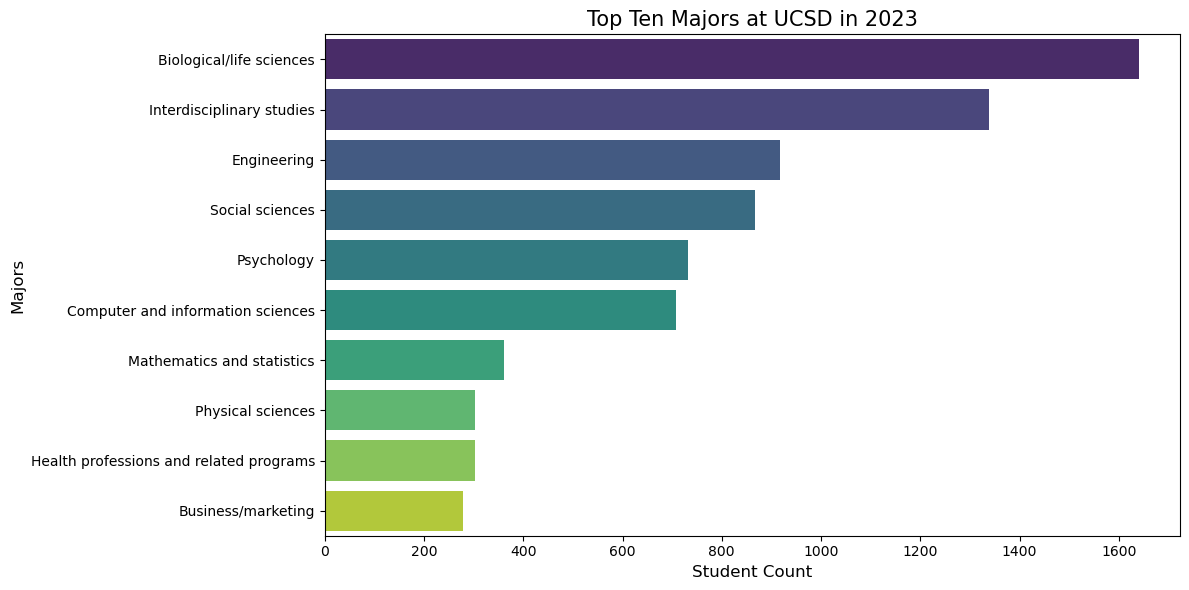

In [75]:
# Filter to include top 10 majors at UCSD
top_ten_ucsd_majors_2023 = ucsd_majors_2023.sort_values(by='Major Count', ascending=False)[:10]
top_ten_ucsd_majors_2023

plt.figure(figsize=(12, 6))
sns.barplot(x='Major Count', y='Category', data=top_ten_ucsd_majors_2023, palette='viridis')

plt.title('Top Ten Majors at UCSD in 2023', fontsize = 15)
plt.xlabel('Student Count', fontsize = 12)
plt.ylabel('Majors', fontsize=12)	
plt.tight_layout()
plt.show()


C:\Users\sarah\AppData\Local\Temp\ipykernel_14156\4271086526.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total Employment', y='Major Field', data=top_ten_ucsd_jobs, palette='viridis')


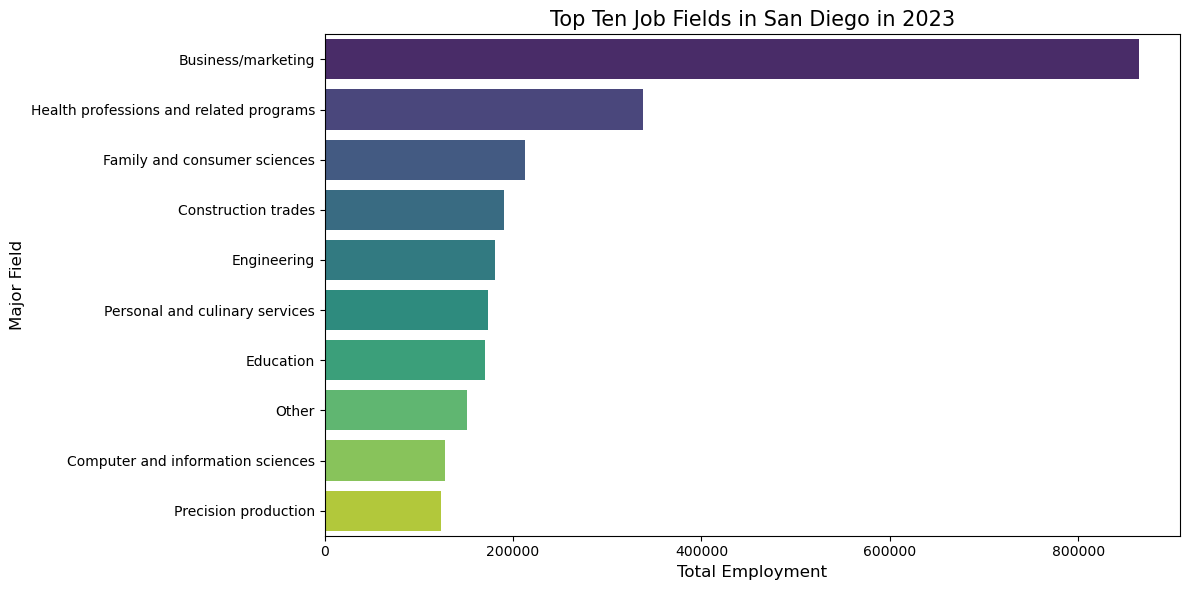

In [82]:
ucsd_job_totals_2023 = ucsd_jobs_2023.groupby('Major Field')['Total Employment'].sum().reset_index()
top_ten_ucsd_jobs = ucsd_job_totals_2023.sort_values(by='Total Employment', ascending=False)[:10]
top_ten_ucsd_jobs

plt.figure(figsize=(12, 6))
sns.barplot(x='Total Employment', y='Major Field', data=top_ten_ucsd_jobs, palette='viridis')

plt.title('Top Ten Job Fields in San Diego in 2023', fontsize = 15)
plt.xlabel('Total Employment', fontsize = 12)
plt.ylabel('Major Field', fontsize=12)	
plt.tight_layout()
plt.show()


By comparing the top ten majors at UCSD with the top ten corresponding job fields in San Diego, we can see a large disparity. The top majors at UCSD include biological/life sciences, interdisciplinary studies, and engineering, whereas the top job fields in San Diego include business/marketing, health professions and related programs, and family and consumer sciences. Although there is some overlap between the top -- for example, health professions and related programs, engineering, computer and information sciences, and business/marketing appear in both top ten lists -- they often appear in different rankings. Despite business/marketing being the largest job field in San Diego by far, it ranks only 10th in bachelors degrees conferred by UCSD in 2023.

### Section 2 of EDA if you need it  - please give it a better title than this

Some more words and stuff.  Remember notebooks work best if you interleave the code that generates a result with properly annotate figures and text that puts these results into context.

In [ ]:
## YOUR CODE HERE
## FEEL FREE TO ADD MULTIPLE CELLS PER SECTION

# Ethics & Privacy

- Thoughtful discussion of ethical concerns included
- Ethical concerns consider the whole data science process (question asked, data collected, data being used, the bias in data, analysis, post-analysis, etc.)
- How your group handled bias/ethical concerns clearly described

Acknowledge and address any ethics & privacy related issues of your question(s), proposed dataset(s), and/or analyses. Use the information provided in lecture to guide your group discussion and thinking. If you need further guidance, check out [Deon's Ethics Checklist](http://deon.drivendata.org/#data-science-ethics-checklist). In particular:

- Are there any biases/privacy/terms of use issues with the data you propsed?
- Are there potential biases in your dataset(s), in terms of who it composes, and how it was collected, that may be problematic in terms of it allowing for equitable analysis? (For example, does your data exclude particular populations, or is it likely to reflect particular human biases in a way that could be a problem?)
- How will you set out to detect these specific biases before, during, and after/when communicating your analysis?
- Are there any other issues related to your topic area, data, and/or analyses that are potentially problematic in terms of data privacy and equitable impact?
- How will you handle issues you identified?

# Team Expectations 


Read over the [COGS108 Team Policies](https://github.com/COGS108/Projects/blob/master/COGS108_TeamPolicies.md) individually. Then, include your group’s expectations of one another for successful completion of your COGS108 project below. Discuss and agree on what all of your expectations are. Discuss how your team will communicate throughout the quarter and consider how you will communicate respectfully should conflicts arise. By including each member’s name above and by adding their name to the submission, you are indicating that you have read the COGS108 Team Policies, accept your team’s expectations below, and have every intention to fulfill them. These expectations are for your team’s use and benefit — they won’t be graded for their details.

* *Team Expectation 1*
* *Team Expectation 2*
* *Team Expecation 3*
* ...

# Project Timeline Proposal

Specify your team's specific project timeline. An example timeline has been provided. Changes the dates, times, names, and details to fit your group's plan.

If you think you will need any special resources or training outside what we have covered in COGS 108 to solve your problem, then your proposal should state these clearly. For example, if you have selected a problem that involves implementing multiple neural networks, please state this so we can make sure you know what you’re doing and so we can point you to resources you will need to implement your project. Note that you are not required to use outside methods.



| Meeting Date  | Meeting Time| Completed Before Meeting  | Discuss at Meeting |
|---|---|---|---|
| 1/20  |  1 PM | Read & Think about COGS 108 expectations; brainstorm topics/questions  | Determine best form of communication; Discuss and decide on final project topic; discuss hypothesis; begin background research | 
| 1/26  |  10 AM |  Do background research on topic | Discuss ideal dataset(s) and ethics; draft project proposal | 
| 2/1  | 10 AM  | Edit, finalize, and submit proposal; Search for datasets  | Discuss Wrangling and possible analytical approaches; Assign group members to lead each specific part   |
| 2/14  | 6 PM  | Import & Wrangle Data (Ant Man); EDA (Hulk) | Review/Edit wrangling/EDA; Discuss Analysis Plan   |
| 2/23  | 12 PM  | Finalize wrangling/EDA; Begin Analysis (Iron Man; Thor) | Discuss/edit Analysis; Complete project check-in |
| 3/13  | 12 PM  | Complete analysis; Draft results/conclusion/discussion (Wasp)| Discuss/edit full project |
| 3/20  | Before 11:59 PM  | NA | Turn in Final Project & Group Project Surveys |